# Support Vector Regression (SVR)

We will train a SVR model to learn and understand the correlations between position levels and salary features => we are hinring a person who expected a salary of 160,000 a year justifying this by saying that he earned 160,000 in the previous company and the data we have is that of his previous company, SO we want to deploy the model to predict the salary of that this person had in his previous company --> and depending on the salary he asked for and some other information --> his position level in this previous company was 6.5

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/sample_data/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
y = y.reshape((len(y), 1)) # we would convert y to 2d array as we would do scaling to y and the fit_transform(+ transform) function of the standard scalar expects a 2d array
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler() # we would consider another standardScalar for the independent variable y as the 1st one calculated mean adn std that are not the same as of the y
y = sc_y.fit_transform(y)

In [ ]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # rbf => Gaussian radial basis function # kernals -> can learn linear or non-linear relationship -> linear kernal -> non-linear kernal such the radial basis
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

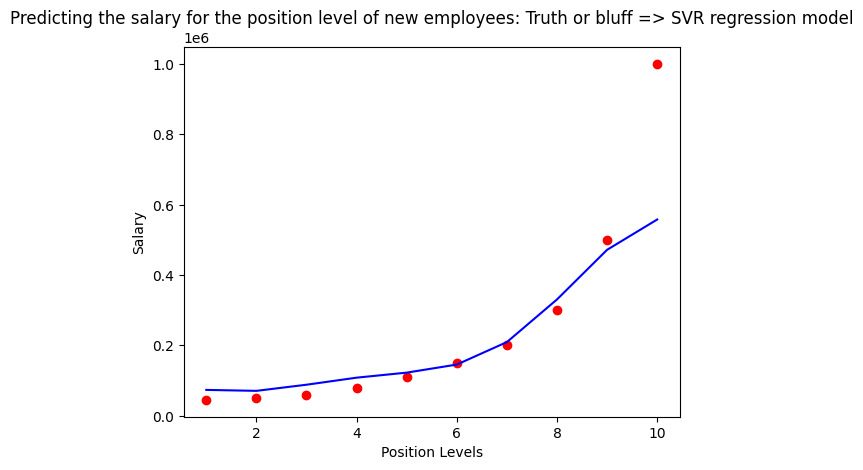

In [ ]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title("Predicting the salary for the position level of new employees: Truth or bluff => SVR regression model")
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-49-8422ad0fcb2c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X))+0.1, 0.1) # the reason that the drawing is not smoth is that the X values are discrete 1,2,3,4,.. --converting them so lessen the difference 1.1,1.2,... --> will make the drawing smoth.


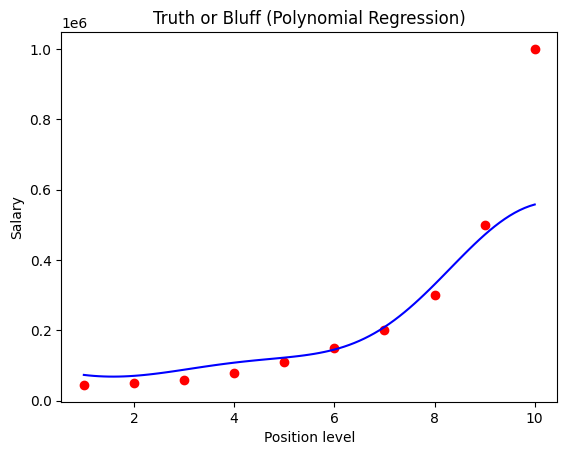

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X))+0.1, 0.1) # the reason that the drawing is not smoth is that the X values are discrete 1,2,3,4,.. --converting them so lessen the difference 1.1,1.2,... --> will make the drawing smoth.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()